<center><font size = "10"> Week 11 - Network Stimulation II and Extracellular recordings<center>
<center><font size = "8">Home Work <center>

Compile the MOD files necesary for the simulation

In [1]:
!nrnivmodl

/home/Week 11
vecevent.mod
vecevent.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  vecevent.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libnrnmech.so .libs/libnrnmech.so.0 .libs/libnrnmech.so.0.0.0
libtool: link: gcc -shared  -fPIC -DPIC  .libs/vecevent.o .libs/mod_func.o   -Wl,-rpath -Wl,/usr/local/nrn/x86_64/lib -Wl,

Load useful packages

In [2]:
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
h.stdinit();

# Ex1. Covariance

<font size='3'>Load the five cells asigned to your group. Connect them randomly with weight 0.1. Attach to a random section of the basal dendritic tree of each cell an ExpSyn with weigth 0.5. Stimulate each cell with a Poissonian stimulation of 75 Hz.

<font size='3'>Using the documentation from the library ELEPHANT, compute the __covariance__ between the spike trains and plot the result.

<font size='3'>What is a Poissonian stimulation? How is it implemented (Hint: look at the elephant source code) Explain the difference between __covariance__, __correlation__ and __coherence__. [2 pts]
    

### Define the class Cell

In [5]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()
        
    def build_morphology(self, filename):
        h.load_file('import3d.hoc')
        h.load_file('stdlib.hoc')
        #morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self) # Notice this change to be able to instantiate several cells
    
    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100    # Axial resistance in Ohm * cm
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
        
        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert('hh')
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
        
        if hasattr(self, 'apic'):
            for sec in self.apic:
                sec.insert('hh')
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
        
        for sec in self.dend:
            sec.insert('hh')
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
                
        for sec in self.axon:
            sec.insert('hh')
            for seg in sec:    
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

### Load the morphologies to work with

In [6]:
# Initialize cells
Pyr1 = Cell('morph_02.swc','Pyr1','Pyr')
Int1 = Cell('morph_03.swc','Int1','Int')
Int2 = Cell('morph_05.swc','Int2','Int')
Pyr2 = Cell('morph_06.swc','Pyr2','Pyr')
Pyr3 = Cell('morph_10.swc','Pyr3','Pyr')
cells_Pyr = [Pyr1, Pyr2, Pyr3]
cells_Int = [Int1, Int2]
cells = cells_Pyr + cells_Int

error morph_02.swc line 19419: could not parse: 
error morph_03.swc line 2503: could not parse: 
error morph_05.swc line 5778: could not parse: 
error morph_06.swc line 14778: could not parse: 
error morph_10.swc line 8181: could not parse: 


### Check the number of sections

In [7]:
for c in cells_Pyr:
    print('%s: %d apical sections, %d basal sections, %d soma sections and %d axon senctions' % (c.name,len(c.apic),len(c.dend), len(c.soma), len(c.axon)))
for c in cells_Int:
    print('%s: %d basal sections, %d soma sections and %d axon senctions' % (c.name,len(c.dend), len(c.soma), len(c.axon)))

Pyr1: 29 apical sections, 38 basal sections, 2 soma sections and 217 axon senctions
Pyr2: 45 apical sections, 52 basal sections, 2 soma sections and 157 axon senctions
Pyr3: 46 apical sections, 37 basal sections, 2 soma sections and 81 axon senctions
Int1: 53 basal sections, 2 soma sections and 157 axon senctions
Int2: 36 basal sections, 2 soma sections and 131 axon senctions


### Connect cells

In [8]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(source, target, weight = None, delay = 5, source_sec = None, source_neurite = 'axon', target_sec = None, target_neurite = 'dend', rng = None, seed = None):
    if rng is None:
        rng = np.random.default_rng(seed)
    
    if weight is None:
        weight = rng.uniform() # random weight
    
    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_)) # random dendritic section
    
    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_)) # random axonal section
    
    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn) # store synapse
    
    netcon = h.NetCon(source_neurite_[source_sec](0.5)._ref_v, target_syn, sec=source_neurite_[source_sec])
    netcon.weight[0] = weight
    netcon.delay = delay
    
    print('Connected cells %s::%s[%d] -> %s::%s[%d] with weight %g and delay %g' % (source.name,source_neurite,source_sec,target.name,target_neurite,target_sec,weight,delay))
    return netcon

In [9]:
netcons = [] # save the netcons in case we want to modify them later

seed = 1234 # specify seed for replicability of all that follows
rng = np.random.default_rng(seed)

# Connect Pyr1 and Pyr2 to Pyr3
nc = connect(Pyr1,Pyr3,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr2,Pyr3,weight = 0.1)
netcons.append(nc)

# Connect Pyr1 and Pyr3 to Pyr2
nc = connect(Pyr1,Pyr2,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Pyr2,weight = 0.1)
netcons.append(nc)

# Connect Pyr2 and Pyr3 to Pyr1
nc = connect(Pyr2,Pyr1,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Pyr1,weight = 0.1)
netcons.append(nc)

# Connect Pyr1, Pyr2 and Pyr 3 to Int1 with weight 1
nc = connect(Pyr1,Int1,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr2,Int1,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Int1,weight = 0.1)
netcons.append(nc)

# Connect Pyr1, Pyr2 and Pyr 3 to Int2 with weight 1
nc = connect(Pyr1,Int2,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr2,Int2,weight = 0.1)
netcons.append(nc)
nc = connect(Pyr3,Int2,weight = 0.1)
netcons.append(nc)

# Connect Int1 to Pyr1, Pyr2 and Pyr 3 with weight -0.01
nc = connect(Int1,Pyr1,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int1,Pyr2,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int1,Pyr3,weight = 0.1,target_neurite='soma')
netcons.append(nc)

# Connect Int2 to Pyr1, Pyr2 and Pyr 3 with weight -0.01
nc = connect(Int2,Pyr1,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int2,Pyr2,weight = 0.1,target_neurite='soma')
netcons.append(nc)
nc = connect(Int2,Pyr3,weight = 0.1,target_neurite='soma')
netcons.append(nc)

# Connect Int1 to Int2 and viceversa with weigh -0.01
nc = connect(Int1,Int2,weight = 0.1,target_neurite='soma') 
netcons.append(nc)
nc = connect(Int2,Int1,weight = 0.1,target_neurite='soma')
netcons.append(nc)

Connected cells Pyr1::axon[123] -> Pyr3::dend[17] with weight 0.1 and delay 5
Connected cells Pyr2::axon[35] -> Pyr3::dend[21] with weight 0.1 and delay 5
Connected cells Pyr1::axon[187] -> Pyr2::dend[19] with weight 0.1 and delay 5
Connected cells Pyr3::axon[13] -> Pyr2::dend[48] with weight 0.1 and delay 5
Connected cells Pyr2::axon[5] -> Pyr1::dend[22] with weight 0.1 and delay 5
Connected cells Pyr3::axon[73] -> Pyr1::dend[5] with weight 0.1 and delay 5
Connected cells Pyr1::axon[141] -> Int1::dend[18] with weight 0.1 and delay 5
Connected cells Pyr2::axon[86] -> Int1::dend[2] with weight 0.1 and delay 5
Connected cells Pyr3::axon[33] -> Int1::dend[34] with weight 0.1 and delay 5
Connected cells Pyr1::axon[216] -> Int2::dend[2] with weight 0.1 and delay 5
Connected cells Pyr2::axon[132] -> Int2::dend[8] with weight 0.1 and delay 5
Connected cells Pyr3::axon[31] -> Int2::dend[30] with weight 0.1 and delay 5
Connected cells Int1::axon[135] -> Pyr1::soma[1] with weight 0.1 and delay 5

### Add synapses

In [10]:
# Place exponential synapses in random cell sections

# Exponential synapses
synapses = []
for cell in cells:
    sec = rng.integers(0, len(cell.dend))
    syn = h.ExpSyn(cell.dend[sec](0.5))
    syn.tau = 2 # ms
    print('ExpSyn created at %s::%s[%s] with tau = %g' % (cell.name,"dend",sec,syn.tau))
    synapses.append(syn)

ExpSyn created at Pyr1::dend[37] with tau = 2
ExpSyn created at Pyr2::dend[50] with tau = 2
ExpSyn created at Pyr3::dend[36] with tau = 2
ExpSyn created at Int1::dend[20] with tau = 2
ExpSyn created at Int2::dend[6] with tau = 2


### Setup stimulator per cell

In [11]:
# Create stimulators for synapses
stims = []
stim_nc = []
for syn in synapses:
    stim = h.VecStim()
    nc = h.NetCon(stim, syn)
    nc.weight[0] = 0.5 # In units of [nS] due to the gmax scaling factor in our .mod file
    stims.append(stim)
    stim_nc.append(nc)

### Setup stimulation times: Poissonian

In [12]:
import elephant.spike_train_generation as elstg
import quantities as pq

# Create a Poissonian spike train
stim_rate = 75 * pq.Hz
stim_tstart = 5 * pq.ms
stim_tstop = 300 * pq.ms

stim_times = []
for stim in stims:
    sptimes = elstg.homogeneous_poisson_process(stim_rate, stim_tstart, stim_tstop, as_array = True)
    spvec = h.Vector(sptimes)
    stim.play(spvec) # make stimulator fire at these times
    stim_times.append(sptimes)
    print(sptimes)

[ 14.70144885  55.98013434  97.82554616 138.05502015 143.87736854
 151.41622911 159.2887701  168.75493241 187.29430815 203.02011806
 225.78590852 243.76674092 246.95589674 250.91037382 255.61959928
 271.7272687  277.14663458 283.29869041]
[  5.87848991  13.52484401  19.2138072   33.21066587  67.41420223
  95.30302124  98.91247012  99.073807   100.42492887 104.06537686
 105.50065051 142.41249524 143.3705306  166.13617141 186.04077897
 193.58381354 210.05738568 230.37053975 232.13614741 232.31215981
 242.17346974 250.94355396 268.51074309 280.8892074  293.07827436
 296.25659084]
[  8.81819535  13.95803354  35.9750635   46.40810772  55.96716431
  56.06328391  74.66945522  83.8471361   97.91949334 111.18207157
 114.37333786 118.88836784 147.37046881 158.0883093  161.83615466
 173.33628714 178.18228036 203.34382746 205.43891189 218.38858362
 219.08679992 223.98583193 270.41262403 276.21190497 281.52405451]
[ 23.10934601  45.62311061  82.35348504  90.66977288 102.07766605
 111.14215122 118.0

/usr/local/lib/python3.6/dist-packages/elephant/pandas_bridge.py:22: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  DeprecationWarning)


### Run simulation

In [13]:
recording_cells = [Pyr1, Pyr2, Pyr3, Int1, Int2]

somaV = []
for cell in recording_cells:
    s = h.Vector().record(cell.soma[0](0.5)._ref_v)
    somaV.append(s)

time = h.Vector().record(h._ref_t)
sim_tstop = 300

h.finitialize(-65)
h.continuerun(sim_tstop)

0.0

### Plot voltage traces

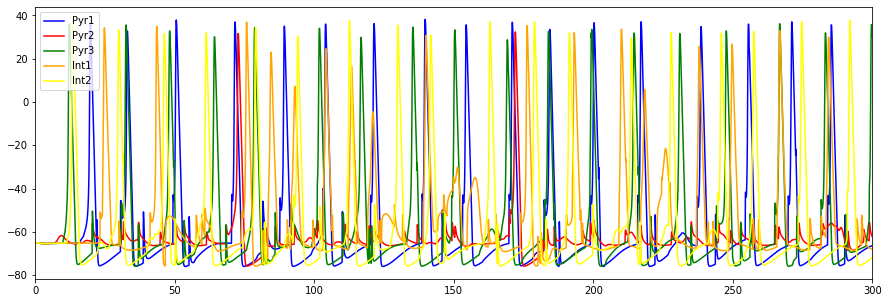

In [14]:
colors = ['blue', 'red', 'green', 'orange', 'yellow']

fig, ax = plt.subplots(figsize=(15,5))
for cell,V,color in zip(recording_cells,somaV,colors):
    ax.plot(time, V, label=cell.name, color=color)

ax.set_xlim((0,sim_tstop))
ax.legend()
plt.show()

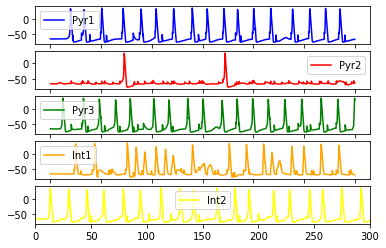

In [15]:
colors = ['blue', 'red', 'green', 'orange', 'yellow']

fig, axs = plt.subplots(5, 1)
for cell,V,color,ax in zip(recording_cells,somaV,colors, axs):
    ax.plot(time, V, label=cell.name, color=color)
    ax.legend()

ax.set_xlim((0,sim_tstop))
plt.show()

### Spike detection

In [16]:
from neo import AnalogSignal

def spike_detector(voltage, threshold):
    # convert Neuron recording (voltage) to neo.AnalogSignal
    sig = AnalogSignal(voltage,units = pq.mV,sampling_period = 0.025 * pq.ms) # dt = 0.025 ms
    # peak locations
    spike_time = elstg.peak_detection(sig,threshold = threshold * pq.mV,format = 'raw')
    return spike_time * 1000 # in ms

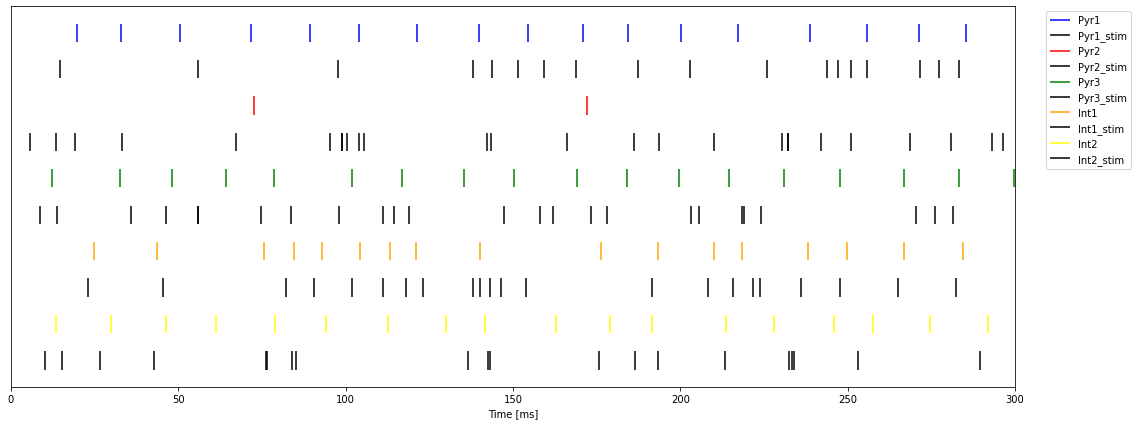

In [17]:
spike_trains = []
for V,st in zip(somaV,stim_times):
    spk = spike_detector(V, -20.0) # tune threshold as needed
    spike_trains.append(spk) # add cell spikes
    spike_trains.append(st)  # add stim spikes
    
name_lst = [[_.name,_.name + '_stim'] for _ in recording_cells]
name_lst = [x for sub in name_lst for x in sub] # https://stackoverflow.com/a/952952

colors = ['blue', 'black', 'red', 'black', 'green', 'black', 'orange', 'black', 'yellow', 'black']

fig, ax = plt.subplots(figsize=(18,7))
for (i,name),spikes,color in zip(enumerate(name_lst),spike_trains,colors):
    ymin = 2 * i * -0.1
    ymax = 2 * i * -0.1 - 0.1
    ax.vlines(spikes, ymin=ymin, ymax=ymax, color=color, label=name)

ax.set_xlim((0,sim_tstop))
ax.set_xlabel("Time [ms]")
ax.set_yticks([])

# Put a legend below current axis
ax.legend(bbox_to_anchor=(1.12, 1))

plt.show()

### Compute the covariance between the spike trains and plot the result

In [18]:
from neo import SpikeTrain
from elephant.conversion import BinnedSpikeTrain
import elephant.spike_train_correlation as elstc

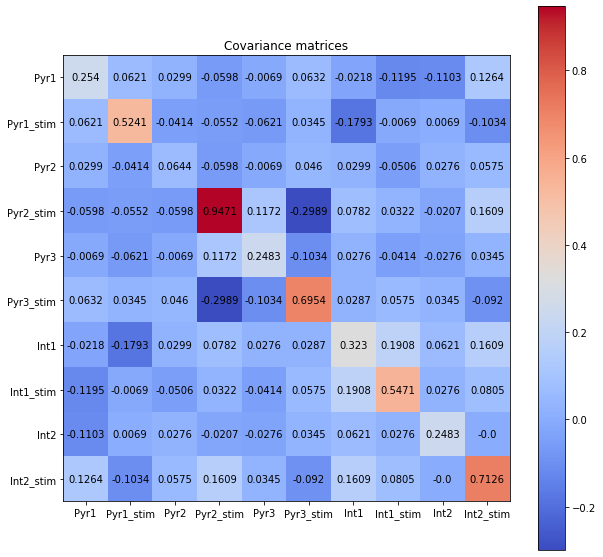

In [20]:
binsize = 10 * pq.ms # 10 ms bin
allspikes = [SpikeTrain(x * pq.ms, t_stop = sim_tstop * pq.ms) for x in spike_trains]
binned_spikes = BinnedSpikeTrain(allspikes, binsize = 10 * pq.ms) # 10 ms bin

cov_matrix = elstc.covariance(binned_spikes)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cov_matrix, cmap="coolwarm", vmin=cov_matrix.min(), vmax=cov_matrix.max(), origin = 'upper')

# We want to show all ticks...
ax.set_xticks(np.arange(len(name_lst)))
ax.set_yticks(np.arange(len(name_lst)))
# ... and label them with the respective list entries
ax.set_xticklabels(name_lst)
_ = ax.set_yticklabels(name_lst)

for i in range(len(name_lst)):
    for j in range(len(name_lst)):
        text = ax.text(j, i, np.round(cov_matrix[i, j],4),
                       ha="center", va="center", color="black")

ax.set_title('Covariance matrices')
plt.colorbar(im)
plt.show()   

A Poissonian stimulation defines a spike train of stimulations whose spikes are a realization of a Poisson process. The Poissonian process is a model for a series of discrete events (in this case, spikes) where the average time between events is known, but the exact timing of each event is random. Moreover, the arrival of an event is independent of the event before.

Both covariance and correlation are metrics used to determine the linear relationship and the dependency between two random variables. However, covariance values are not standardized (i.e. they are affected by the change of scale of the variables) and cannot be used to compare how strong or weak the relationship is. On the other hand, correlation values are standarized and they can only assume values between -1 to 1, so they can represent how strongly the two variables are related to each other. Positive values between two variables will indicate that both variables move in the same direction: when one variable increases, the other increases and viceversa. Coherence is similar to correlation, but with the difference that it looks to similarity between two variables in the frequency space. In other words, coherence measures the degree of linear dependency of two signals by testing for similar frequency components.


# Ex2. Extracellular response of synaptic imput

<font size='3'>Choose one pyramidal cell from your set of morphologies and run tutorial 03 but replacing the morphology file by the one you chose. Be careful with the rotation angles, the cell has to be aligned with the line of electrodes.

<font size='3'>Explain what do you see on the final plots. Explain the calculation that is performed by RecExtElectrode to get the recorded voltage (Hint: Look at the default "method" parameter for RecExtElectrode)  [1.5 pts]

## Extracellular response of synaptic input

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cellParameters = {
    'morphology' : 'morph_02.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

z = np.mgrid[-800:1201:100]
electrodeParameters = {
    'x' : np.zeros(z.size),
    'y' : np.zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [3]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(x=4.71239, y=0.0, z=4.71239, rotation_order='xyz') # angles in radians!!

synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=300),
                       **synapseParameters)
synapse.set_spike_times(np.array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(**electrodeParameters)

error morph_02.swc line 19419: could not parse: 


In [4]:
cell.simulate(electrode = electrode)

(-1000.0, 1000.0, -800.0, 1200.0)

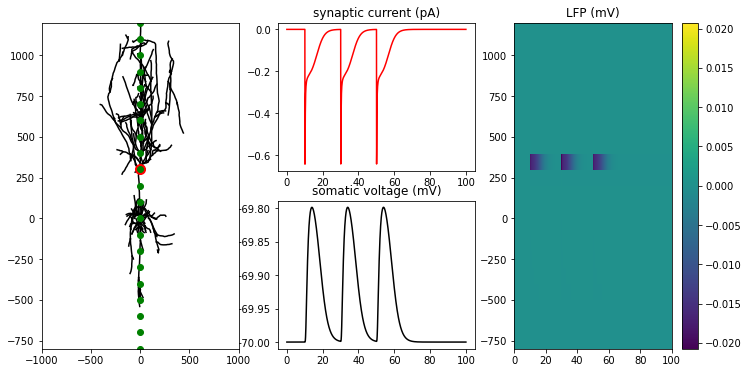

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(133)
plt.pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
plt.colorbar()
plt.title('LFP (mV)')

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, 'r'), plt.title('synaptic current (pA)')

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, 'k'), plt.title('somatic voltage (mV)')

plt.subplot(131)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plt.plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plt.plot([cell.synapses[0].x], [cell.synapses[0].z], 
     color='r', marker='o', markersize=10)
plt.plot(electrode.x, electrode.z, '.', marker='o', color='g')
plt.axis([-1000, 1000, -800, 1200])

To get the recorded voltage, RecExtElectrode computes the extracellular potentials after simulating and storage of transmembrane currents. It creates a linear mapping of transmembrane currents of each segment of the supplied Cell object to contribution to extracellular potential at each electrode contact point of the RexExtElectrode object.
    
The first plot (left plot) shows our cell (in black) aligned with the electrode array (in green). The synapse point is in red. The next two plots to the right show the synaptic current applied and the somatic voltage. The synaptic current spikes, which happens at the spike times indicated in the code (10, 30 and 50 ms), lead to the changes in the somatic voltage visualized. The last plot to the right shows the local field potential at different times (x-axis) for the different electrodes (y-axis). We can see the change in extracellular potential generated due to spike stimulation in dark blue. We can see that the extracellular potential changes for the region the closest to the electrode placed where the synapse (around 350 in the y-axis), as expected.

# Ex3. EEG

<font size='3'>Choose one pyramidal cell and one inhibitory cell from your set of cells. Run the code from tutorial 04 for each of the cells and compare the current dipoles. Explain what differences do you see and why. Find a set of EEG electrodes that results in a large difference in the recorded signal between the two cells. [2.5 pts] 

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_cell_to_ax(cell, ax, synidxs):
    for idx in range(cell.totnsegs):
        if idx == 0:
            ax.plot(cell.x[idx].mean(), cell.z[idx].mean(), 'ko')
        else:
            ax.plot(cell.x[idx], cell.z[idx], c='k')

    for synidx in synidxs:
        l, = ax.plot(cell.x[synidx].mean(), cell.z[synidx].mean(), '*',
                     c="r", ms=10)
    ax.legend([l], ["Synapse"], frameon=False, bbox_to_anchor=[1, -0.1])


def plot_EEG_sphere(fig, eeg, x_eeg, y_eeg, z_eeg):
    ax = fig.add_subplot(322, projection='3d',
                         title="Max EEG potential\nat 4-sphere surface")
    vmax = 6
    vmin = -vmax

    def clr(phi):
        return plt.cm.PRGn((phi - vmin) / (vmax - vmin))

    clrs = clr(eeg)
    ax.plot_surface(x_eeg.reshape(num_theta, num_phi),
                    y_eeg.reshape(num_theta, num_phi),
                    z_eeg.reshape(num_theta, num_phi),
                    rstride=1, cstride=1, facecolors=clrs,
                    linewidth=0, antialiased=False)

    # ax.set_aspect('equal') # Raises NotImplementedError in MPL currently
    ax.axis('off')
    ax.set_xlim3d(-65000, 65000)
    ax.set_ylim3d(-65000, 65000)
    ax.set_zlim3d(-65000, 65000)
    ax.view_init(10, 0)

    # colorbar
    cax = fig.add_axes([0.65, 0.75, 0.25, 0.01])
    m = plt.cm.ScalarMappable(cmap=plt.cm.PRGn)
    ticks = np.linspace(vmin, vmax, 5)  # global normalization
    m.set_array(ticks)
    cbar = fig.colorbar(m, cax=cax,
                        extend='both', orientation='horizontal')
    cbar.outline.set_visible(False)
    cbar.set_ticks(ticks)
    cbar.set_label(r'$\phi$ (pV)', labelpad=1.)

In [3]:
# four_sphere properties
radii = np.array([79000, 80000, 85000, 90000])
sigmas = [0.3, 1.5, 0.015, 0.3]
rad_tol = 1e-2

# simulate cell
syn_loc = (0, 0, 1000)

In [4]:
# measurement points --> possible eeg coords
# for nice plot use theta_step = 1 and phi_step = 1. NB: Long computation
# time.
theta_step = 5
phi_step = 5
theta, phi_angle = np.mgrid[0.:180.:theta_step,
                            0.:360. + phi_step:phi_step]

num_theta = theta.shape[0]
num_phi = theta.shape[1]
theta = theta.flatten()
phi_angle = phi_angle.flatten()

theta_r = np.deg2rad(theta)
phi_angle_r = np.deg2rad(phi_angle)

x_eeg = (radii[3] - rad_tol) * np.sin(theta_r) * np.cos(phi_angle_r)
y_eeg = (radii[3] - rad_tol) * np.sin(theta_r) * np.sin(phi_angle_r)
z_eeg = (radii[3] - rad_tol) * np.cos(theta_r)
eeg_coords = np.vstack((x_eeg, y_eeg, z_eeg)).T
eeg_coords

array([[ 0.00000000e+00,  0.00000000e+00,  8.99999900e+04],
       [ 0.00000000e+00,  0.00000000e+00,  8.99999900e+04],
       [ 0.00000000e+00,  0.00000000e+00,  8.99999900e+04],
       ...,
       [ 7.72484775e+03, -1.36209908e+03, -8.96575129e+04],
       [ 7.81416713e+03, -6.83651038e+02, -8.96575129e+04],
       [ 7.84401598e+03, -1.92122981e-12, -8.96575129e+04]])

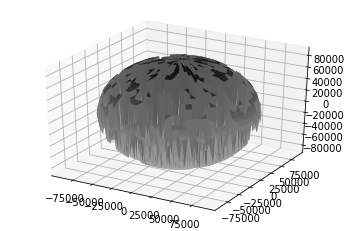

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x_eeg, y_eeg, z_eeg, cmap='binary')

### Pyramidal cell

In [8]:
cellParameters = {
    'morphology' : 'morph_02.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

In [9]:
# create cell with parameters in dictionary
cell = LFPy.Cell(**cellParameters)
pos = syn_loc
synapseParameters['idx'] = cell.get_closest_idx(x=pos[0], y=pos[1], z=pos[2])
synapse = LFPy.Synapse(cell, **synapseParameters)
synapse.set_spike_times(np.array([5.]))

cell.simulate(rec_imem=True,rec_vmem=True)

error morph_02.swc line 19419: could not parse: 


In [10]:
# compute dipole
P= LFPy.get_current_dipole_moment(np.c_[cell.xmid,cell.ymid,cell.zmid],cell.imem)
P = P[0]

In [11]:
somapos = np.array([0., 0., 77500])
r_soma_syns = [
    cell.get_intersegment_vector(
        idx0=0,
        idx1=i) for i in cell.synidx]
r_mid = np.average(r_soma_syns, axis=0)
r_mid = somapos + r_mid / 2.

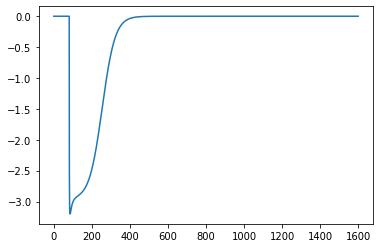

In [12]:
eeg_coords_top = np.array([[0., 0., radii[3] - rad_tol]])
four_sphere_top = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top = four_sphere_top.calc_potential(P, r_mid)
eeg_top = np.array(pot_db_4s_top) * 1e9

eeg_coords_bot = np.array([[0., -radii[3] + rad_tol,0.]])
four_sphere_bot= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot = four_sphere_bot.calc_potential(P, r_mid)
eeg_bot = np.array(pot_db_4s_bot) * 1e9

eeg = eeg_top-eeg_bot

plt.figure()
plt.plot(eeg.T)

## Playing with different electrodes positions
#### New coordinates --> 

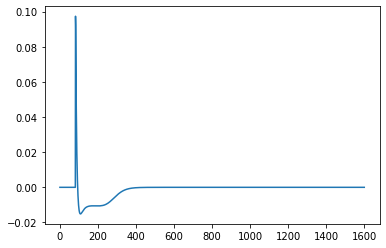

In [13]:
eeg_coords_top = np.array([eeg_coords[700]]) # change it here
four_sphere_top = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top = four_sphere_top.calc_potential(P, r_mid)
eeg_top = np.array(pot_db_4s_top) * 1e9

eeg_coords_bot = np.array([eeg_coords[800]])
four_sphere_bot= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot = four_sphere_bot.calc_potential(P, r_mid)
eeg_bot = np.array(pot_db_4s_bot) * 1e9

eeg = eeg_top-eeg_bot

plt.figure()
plt.plot(eeg.T)

### Inhibitory cell

In [14]:
cellParameters = {
    'morphology' : 'morph_03.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

In [15]:
# create cell with parameters in dictionary
cell = LFPy.Cell(**cellParameters)
pos = syn_loc
synapseParameters['idx'] = cell.get_closest_idx(x=pos[0], y=pos[1], z=pos[2])
synapse = LFPy.Synapse(cell, **synapseParameters)
synapse.set_spike_times(np.array([5.]))

cell.simulate(rec_imem=True,rec_vmem=True)

error morph_03.swc line 2503: could not parse: 


In [16]:
# compute dipole
P= LFPy.get_current_dipole_moment(np.c_[cell.xmid,cell.ymid,cell.zmid],cell.imem)
P = P[0]

In [17]:
somapos = np.array([0., 0., 77500])
r_soma_syns = [
    cell.get_intersegment_vector(
        idx0=0,
        idx1=i) for i in cell.synidx]
r_mid = np.average(r_soma_syns, axis=0)
r_mid = somapos + r_mid / 2.

In [18]:
eeg_coords_top = np.array([[0., 0., radii[3] - rad_tol]])
four_sphere_top = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top = four_sphere_top.calc_potential(P, r_mid)
eeg_top = np.array(pot_db_4s_top) * 1e9

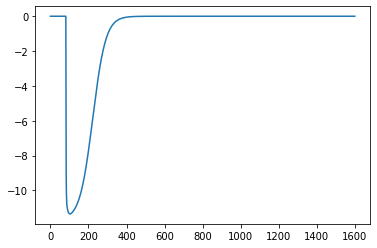

In [19]:
eeg_coords_bot = np.array([[0., -radii[3] + rad_tol,0.]])
four_sphere_bot= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot = four_sphere_bot.calc_potential(P, r_mid)
eeg_bot = np.array(pot_db_4s_bot) * 1e9

eeg = eeg_top-eeg_bot

plt.figure()
plt.plot(eeg.T)

#### Same new coordinates as for the excitatory cell

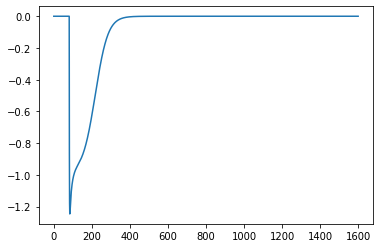

In [20]:
eeg_coords_top = np.array([eeg_coords[700]]) # change it here
four_sphere_top = LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_top)
pot_db_4s_top = four_sphere_top.calc_potential(P, r_mid)
eeg_top = np.array(pot_db_4s_top) * 1e9

eeg_coords_bot = np.array([eeg_coords[800]])
four_sphere_bot= LFPy.FourSphereVolumeConductor(radii, sigmas, eeg_coords_bot)
pot_db_4s_bot = four_sphere_bot.calc_potential(P, r_mid)
eeg_bot = np.array(pot_db_4s_bot) * 1e9

eeg = eeg_top-eeg_bot

plt.figure()
plt.plot(eeg.T)

To obtain the EEG signal, we compute the signal recorded from one electrode and subtract it to the signal of a reference electrode. We choose an inhibitory and an excitatory cell. If we use the set of electrodes provided in the tutorial, we get a negative EEG signal in both cases. However, it is more negative for the inhibitory cell. At the beginning of the exercise we plotted the surface distribution of the electrodes. Then, we selected a pair of electrodes, with index 700 and 800 in our set, that yield to a big difference between the signal of the excitatory and the inhibitory cell. In this case, the EEG signal recorded for the excitatory cell is positive while for the inhibitory cell is negative. It is important to highlight that this difference depends on the position of the electrodes, and which electrode is used as a reference. For example, if we switch the electrodes and use the first one as a reference, we would obtain a positive signal for the inhibitory and a negative for the excitatory. These results are difficult to interpret, we have to consider the position and orientation of our cell in the space.